In [88]:
import pandas as pd
import numpy as np
import seaborn as sns


## split train test

In [18]:
df = pd.read_csv('./data.csv')

In [57]:
names, dfs = zip(*df.groupby(['channel_id']))

In [64]:
np.random.seed(42)
idx = np.arange(len(names))
np.random.shuffle(idx)
test_ratio = .3
size = int(len(names) * test_ratio)
train_idx, test_idx = idx[size:], idx[:size]

In [65]:
train_df = pd.concat([dfs[i] for i in train_idx])

In [66]:
train_df.shape

(68863, 9)

In [67]:
test_df = pd.concat([dfs[i] for i in test_idx])

In [68]:
test_df.shape

(32301, 9)

## load train test

In [75]:
df_train = pd.read_csv('./cap-train.csv')
df_test = pd.read_csv('./cap-test.csv')

In [85]:
df_train.views.describe()

count    6.886300e+04
mean     2.780326e+05
std      1.637634e+06
min      0.000000e+00
25%      6.065000e+03
50%      3.554100e+04
75%      1.815495e+05
max      3.279143e+08
Name: views, dtype: float64

/shared/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

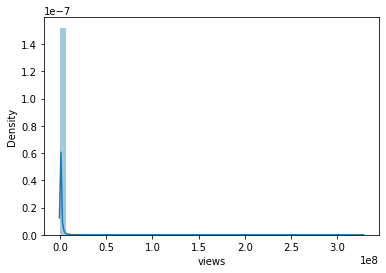

In [89]:
sns.distplot(df_train.views)

In [92]:
df_train.columns

Index(['title', 'video_id', 'channel_name', 'channel_id', 'publish_time',
       'views', 'preprocessed_title', 'subscriber_count', 'thumbnail'],
      dtype='object')

In [90]:
y_train = df_train.views.values
x_train = df_train.drop('views', 1)

In [131]:
source = np.log(df_train['views'].values).astype(np.int)
source[source < 0] = 0

<ipython-input-131-50a7a7714f88>:1: RuntimeWarning: divide by zero encountered in log
  source = np.log(df_train['views'].values).astype(np.int)


<ipython-input-138-888cb3e65d8d>:1: RuntimeWarning: invalid value encountered in log
  target = np.log(df_train['subscriber_count'].values).astype(np.int)


<AxesSubplot:xlabel='target', ylabel='source'>

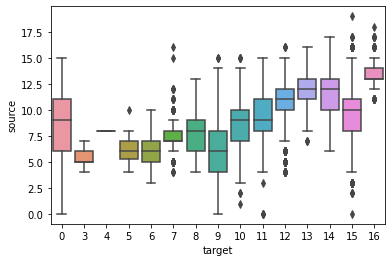

In [138]:
target = np.log(df_train['subscriber_count'].values).astype(np.int)
target[target < 0] = 0
data = pd.DataFrame()
data['source'] = source
data['target'] = target
sns.boxplot(x='target', y='source', data=data)

In [140]:
df_train['publish_time'].values

array(['2021-03-26T02:21:47Z', '2021-03-18T15:14:34Z',
       '2021-03-16T16:56:12Z', ..., '2018-12-17T04:05:09Z',
       '2018-12-17T02:11:53Z', '2018-12-17T00:21:34Z'], dtype=object)

In [139]:
target = np.log(df_train['publish_time'].values).astype(np.int)
target[target < 0] = 0
data = pd.DataFrame()
data['source'] = source
data['target'] = target
sns.boxplot(x='target', y='source', data=data)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method